## Real State- PRICE PREDICTOR

In [1]:
import pandas as pd

housing_df=pd.read_csv("data.csv")
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,NaN,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       502 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [3]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,502.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283576,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704100,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884250,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
housing_df["CHAS"].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

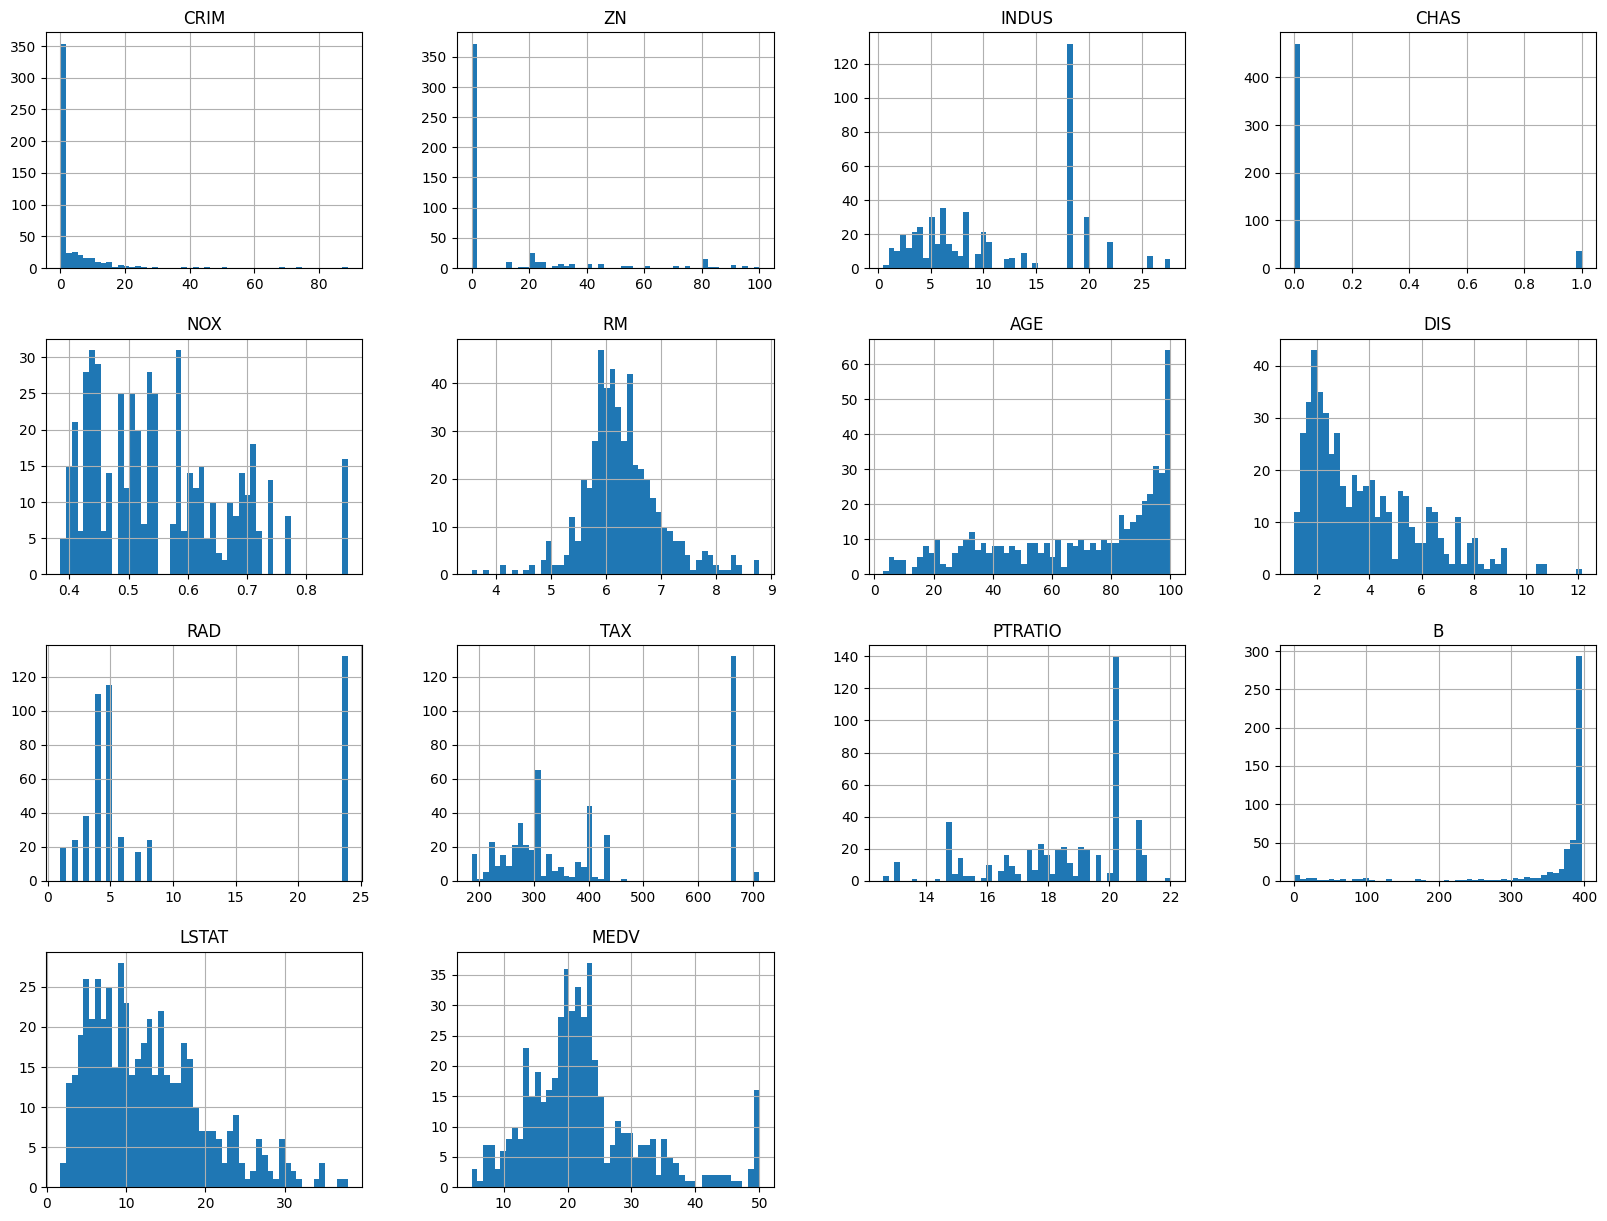

In [5]:
# histogram
housing_df.hist(bins=50,figsize=(20,15))

## TRAIN-TEST SPLITTING

In [6]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(housing_df, test_size=0.2, random_state=42, stratify=housing_df["CHAS"])
print(f"rows in train_set {len(train_set)} \nrows in test_set {len(test_set)}")

rows in train_set 404 
rows in test_set 102


In [7]:
housing_df= train_set.copy()

## LOOKING FOR CORRELATIONS

In [8]:
corr_matrix=housing_df.corr()
corr_matrix["MEDV"].sort_values(ascending=False)   # pearsion correlation--how much proportion[- or +]

MEDV       1.000000
RM         0.679510
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

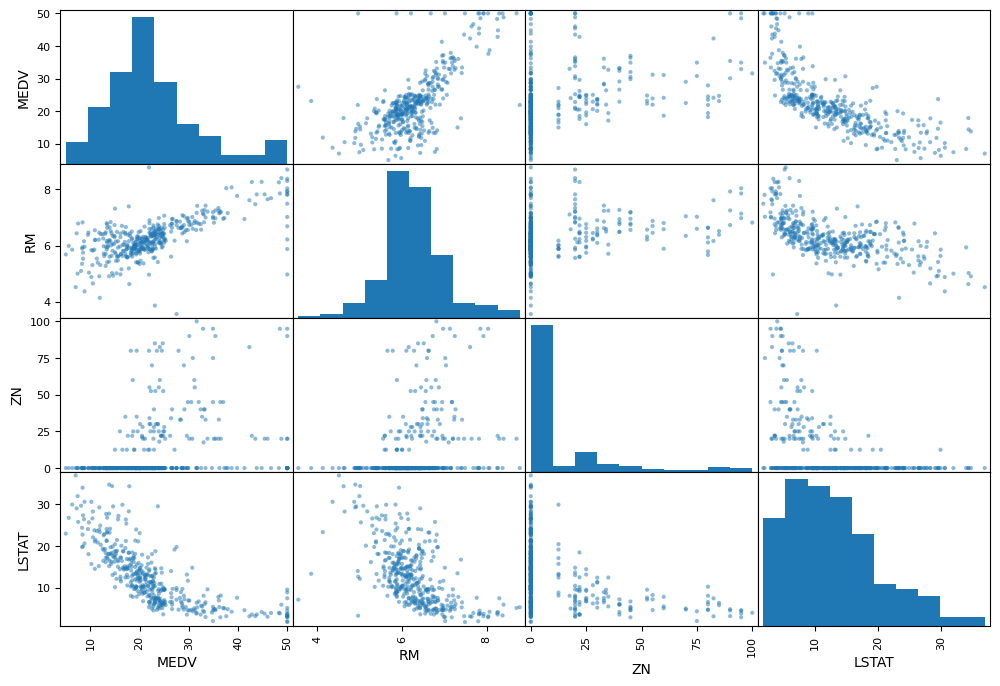

In [9]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing_df[attributes],figsize=(12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

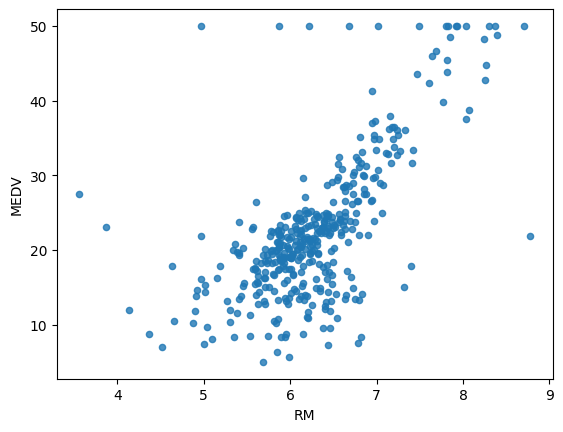

In [10]:
housing_df.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

## ATTRIBUTE COMBINATION

In [11]:
housing_df["TAXRM"]=housing_df["TAX"]/housing_df["RM"]
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


<Axes: xlabel='TAXRM', ylabel='MEDV'>

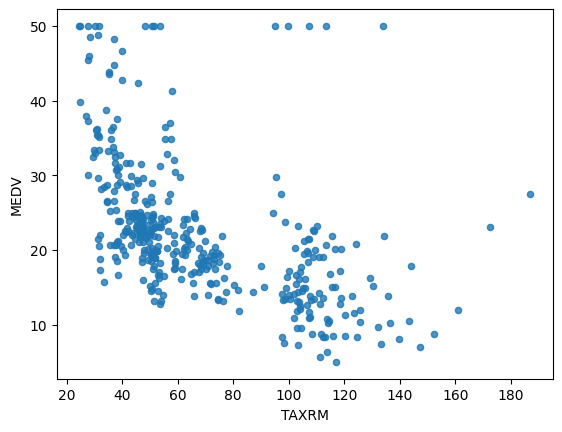

In [12]:
housing_df.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

## MISSING ATTRIBUTES

In [13]:
housing_df=train_set.drop("MEDV",axis=1)
housing_labels=train_set["MEDV"].copy()

In [14]:
# # [at missing data place replace with median]

# median=housing_df["RM"].median()   
# housing_df["RM"].fillna(median) 

In [15]:
# from sklearn.impute import SimpleImputer
# imputer=SimpleImputer(strategy="median")
# imputer.fit_transform(housing_df)

In [16]:
housing_df.shape

(404, 13)

In [17]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278532,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.714911,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.877250,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## CREATING A PIPELINE

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([('imputer',SimpleImputer(strategy="median")),
                      ('std_scaler',StandardScaler()), ])

In [19]:
housing_num_tr=my_pipeline.fit_transform(housing_df)  
housing_num_tr.shape

(404, 13)

In [20]:
housing_tr=pd.DataFrame(housing_num_tr,columns=housing_df.columns)

In [21]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


## SELECTING A DESIRE MODEL FOR DRAGON REAL ESTATES

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model=LinearRegression()
# model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [23]:
some_data=housing_df.iloc[:5]
some_labels=housing_labels.iloc[:5]
prepared_data=my_pipeline.transform(some_data)
model.predict(prepared_data)

array([22.253, 25.218, 16.634, 23.372, 23.473])

In [24]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## EVALUATING THE MODEL

In [25]:
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)

In [26]:
mse

1.6772246237623745

In [27]:
rmse

np.float64(1.2950770725182246)

## CROSS VALIDATION

In [28]:
# 1 2 3 4 5 6 7 8 9 
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model, housing_num_tr,housing_labels,scoring="neg_mean_squared_error", cv=10)
rmse_scores=np.sqrt(-scores)

In [29]:
scores

array([ -7.23953515,  -7.70147024, -20.36757983,  -6.89432156,
       -11.29961068,  -7.04095158, -20.30591232, -11.88142232,
        -8.75518548,  -9.9003559 ])

In [30]:
def print_scores(scores):
    print("scores",scores)
    print("mean",scores.mean())
    print("standard deviation",scores.std())

In [31]:
print_scores(rmse_scores)

scores [2.69063843 2.77515229 4.51304552 2.62570401 3.36148935 2.65347915
 4.5062082  3.44694391 2.95891627 3.1464831 ]
mean 3.2678060223062046
standard deviation 0.6782907238994816


## SAVING THE MODEL

In [32]:
from joblib import dump, load
dump(model,'real_pred.joblib')

['real_pred.joblib']

## Testing the model on test data

In [33]:
x_test=test_set.drop("MEDV",axis=1)
y_test=test_set["MEDV"].copy()
x_test_prepared=my_pipeline.transform(x_test)
final_prediction=model.predict(x_test_prepared)
print(final_prediction)

[24.183 11.795 25.617 21.848 18.763 14.885 20.305 14.522 31.259 42.347
 19.376 11.993 23.977 29.283 19.508 11.154 30.75  14.715 23.839 18.379
 20.468 17.667 17.91  22.042 18.652 31.073 16.085 32.804  9.191 33.042
 23.382 21.132 23.203 10.754 20.826 11.185 43.919 24.626 23.082 41.965
 23.779 30.645 20.653 21.028 19.273 32.954 44.454 20.14  20.509 21.617
 21.568 14.32  21.059 14.596 24.787 33.319 43.217 29.455 19.644 20.806
 46.74   9.872 18.53  25.554 14.453 33.09  19.794 17.849 19.325 33.607
 26.552 22.92  21.654 22.439 34.5   12.937 15.698 19.809 20.932 21.23
 22.771 20.986 13.83  23.994 20.301 21.306 13.799 21.06  21.927 23.246
 18.548 27.479  7.136 26.454 19.42  29.821 20.145 31.375 14.189 27.102
 21.788 20.06 ]


In [34]:
print(list(y_test))

[16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 41.7, 18.7, 19.9, 20.6, 21.2, 13.6, 20.3, 17.8, 27.1, 31.5, 50.0, 29.1, 18.9, 20.4, 50.0, 7.2, 17.2, 36.2, 14.6, 33.2, 23.8, 19.9, 21.5, 37.3, 27.0, 22.0, 24.3, 19.8, 33.3, 7.0, 19.4, 20.9, 21.1, 20.4, 22.2, 11.9, 11.7, 21.6, 19.7, 23.0, 16.7, 21.7, 20.6, 23.3, 19.6, 28.0, 5.0, 24.4, 20.8, 24.8, 21.8, 23.6, 19.0, 25.0, 20.3, 21.5]


In [35]:
print(type(model)) 

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
